In [2]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

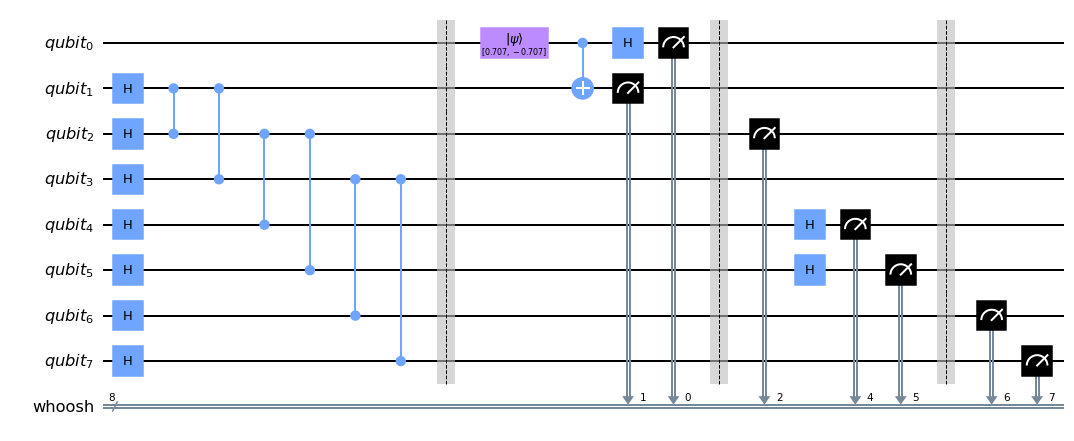

In [26]:
# Build 6-qubit cluster state
quantum_registers = QuantumRegister(8, 'qubit')
classical_throw = ClassicalRegister(8, 'whoosh')
cluster_state_6 = QuantumCircuit(quantum_registers, classical_throw)
for i in range(1,8):
    cluster_state_6.h(i)
cluster_state_6.cz(1, 2)
cluster_state_6.cz(1, 3)
cluster_state_6.cz(2, 4)
cluster_state_6.cz(2, 5)
cluster_state_6.cz(3, 6)
cluster_state_6.cz(3, 7)
cluster_state_6.barrier()
# initialize messenger qubit_0
cluster_state_6.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
# entangle messenger qubit_0
cluster_state_6.cnot(0, 1)
cluster_state_6.h(0)
cluster_state_6.measure(0, 0)
cluster_state_6.measure(1, 1)
cluster_state_6.barrier()
# measure all of branch 1, 1st level in z, 2nd level in x
cluster_state_6.measure(2, 2)
cluster_state_6.h(4)
cluster_state_6.h(5)
cluster_state_6.measure(4, 4)
cluster_state_6.measure(5, 5)
cluster_state_6.barrier()
# measure 2nd level qubits of branch 2 in z
cluster_state_6.measure(6, 6)
cluster_state_6.measure(7, 7)
# information now contained in qubit 3 --> measure fidelity with "messenger state"
# draw
cluster_state_6.draw()

In [ ]:
# import new qiskit stuff
import qiskit.quantum_info as qi

In [28]:
# get fidelity of qubit 3 with qubit 0 --> 
# https://quantumcomputing.stackexchange.com/questions/15110/
# get-state-vector-of-a-single-qubit-in-a-circuit-in-qiskit
# and
# https://qiskit.org/documentation/tutorials/noise/8_tomography.html
# get the full statevector of all qubits
full_statevector_6 = qi.Statevector(cluster_state_6)

# get the density matrix for the first qubit by taking the partial trace
pdm_6_q3 = partial_trace(full_statevector_6, [0, 1, 2, 4, 5, 6, 7])
pdm_6_q0 = partial_trace(full_statevector_6, [1, 2, 3, 4, 5, 6, 7])

# extract the statevector out of the density matrix
psv_6_q3 = np.diagonal(partial_density_matrix)

Traceback (most recent call last):
  Input In [28] in <cell line: 7>
    full_statevector_6 = qi.Statevector(cluster_state_6)
  File /opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/states/statevector.py:89 in __init__
    self._data = Statevector.from_instruction(data).data
  File /opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/states/statevector.py:732 in from_instruction
    return Statevector._evolve_instruction(vec, instruction)
  File /opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/states/statevector.py:864 in _evolve_instruction
    raise QiskitError(
QiskitError: 'Cannot apply instruction with classical registers: measure'

Use %tb to get the full traceback.
